<a href="https://colab.research.google.com/github/perfection1sta/SQL/blob/main/NetflixDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
netflix = pd.read_csv('netflix_titles.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix.shape

(9461, 12)

In [ ]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2750
cast             903
country          859
date_added        11
release_year       1
rating             5
duration           4
listed_in          2
description        2
dtype: int64

In [ ]:
netflix.nunique()

show_id         8808
type               3
title           8808
director        4529
cast            7693
country          750
date_added      1769
release_year      75
rating            18
duration         221
listed_in        514
description     8774
dtype: int64

In [ ]:
netflix.duplicated().sum()


653

In [ ]:
df = netflix

In [ ]:
df = df.dropna()
df.shape

(5797, 12)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [ ]:
df.describe()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,5797,5797,5797,5797,5797,5797,5797,5797,5797,5797,5797,5797
unique,5331,2,5331,3944,5199,604,1453,72,14,198,335,5320
top,s8164,Movie,Temporada de Caza,"Raúl Campos, Jan Suter",Samuel West,United States,"January 1, 2020",2017,TV-MA,94 min,"Dramas, International Movies",When Elastigirl gets recruited for a high-prof...
freq,2,5645,2,18,10,2033,119,718,1927,155,365,3


In [ ]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year    object
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['day_added'] = df['date_added'].dt.day
df['year_added'] = df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
df['year_added'].astype(int);
df['day_added'].astype(int);


<ipython-input-54-b54d5143cdb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date_added"] = pd.to_datetime(df['date_added'])
<ipython-input-54-b54d5143cdb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_added'] = df['date_added'].dt.day
<ipython-input-54-b54d5143cdb9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [ ]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year            object
rating                  object
duration                object
listed_in               object
description             object
day_added                int64
year_added               int64
month_added              int64
dtype: object

In [ ]:
df['type'].head

<bound method NDFrame.head of 7         Movie
8       TV Show
9         Movie
12        Movie
24        Movie
         ...   
9455      Movie
9456      Movie
9458      Movie
9459      Movie
9460      Movie
Name: type, Length: 5797, dtype: object>

Text(0.5, 1.0, 'Type')

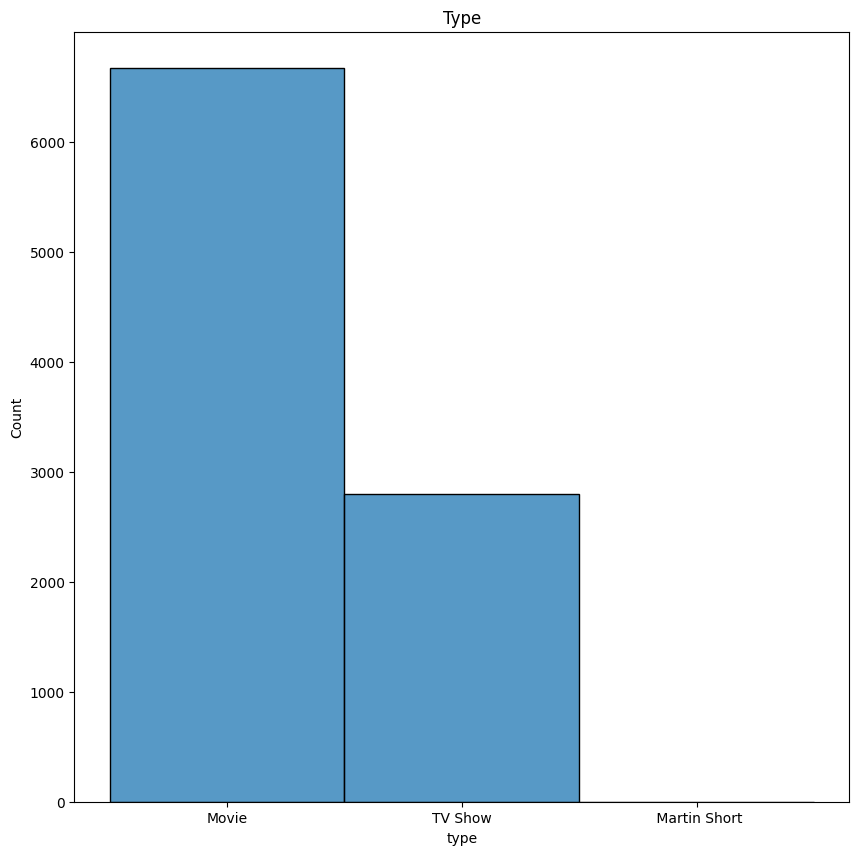

In [ ]:
sns.histplot(data=netflix, x="type")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Type')

<ipython-input-62-9cf4bc9030f2>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.histplot(netflix['rating']).set_xticklabels(sns.histplot(netflix['rating']).get_xticklabels(), rotation=90, ha="right")


Text(0.5, 1.0, 'Rating')

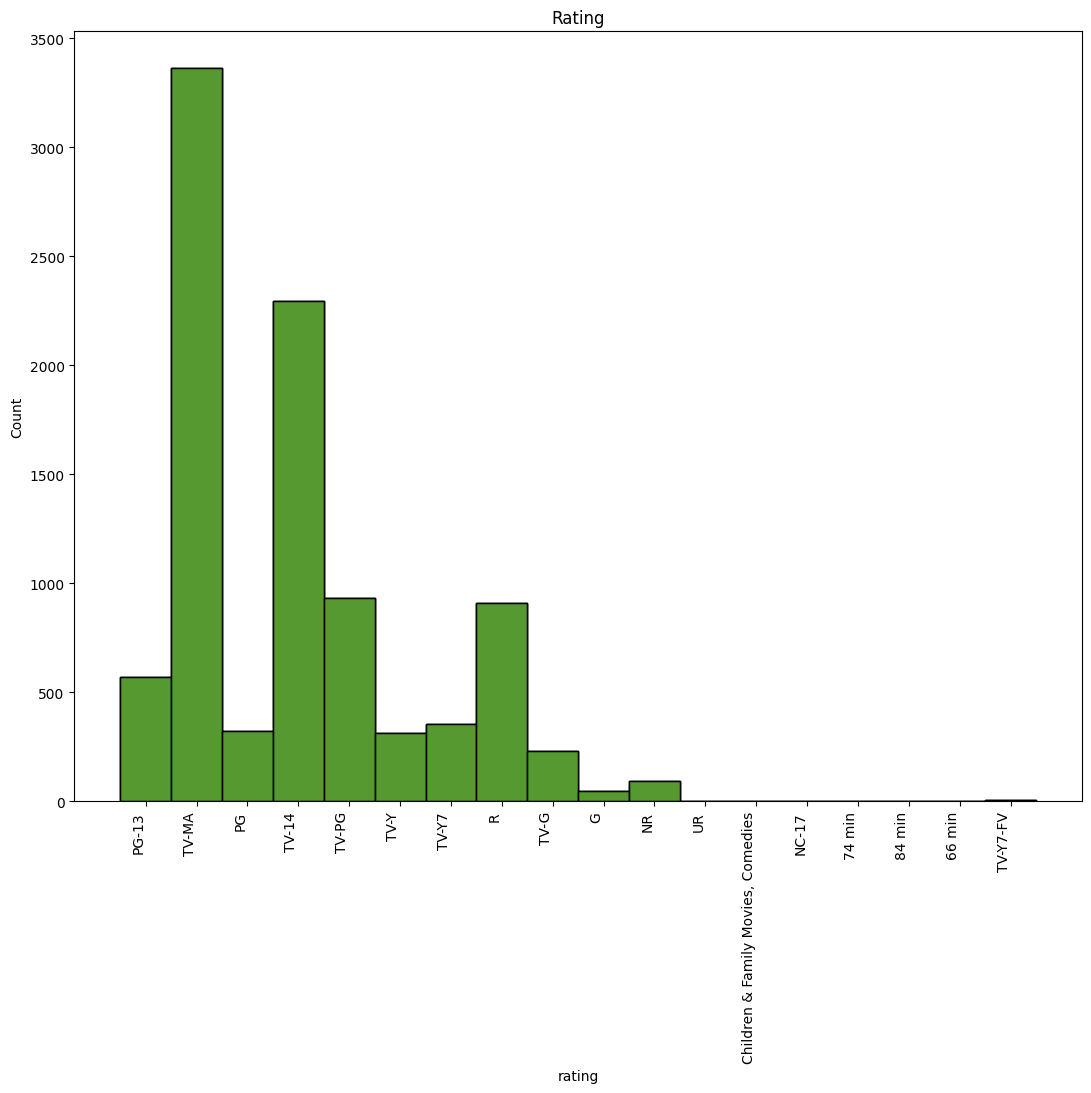

In [ ]:
sns.histplot(netflix['rating'])
sns.histplot(netflix['rating']).set_xticklabels(sns.histplot(netflix['rating']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,10)
plt.title('Rating')

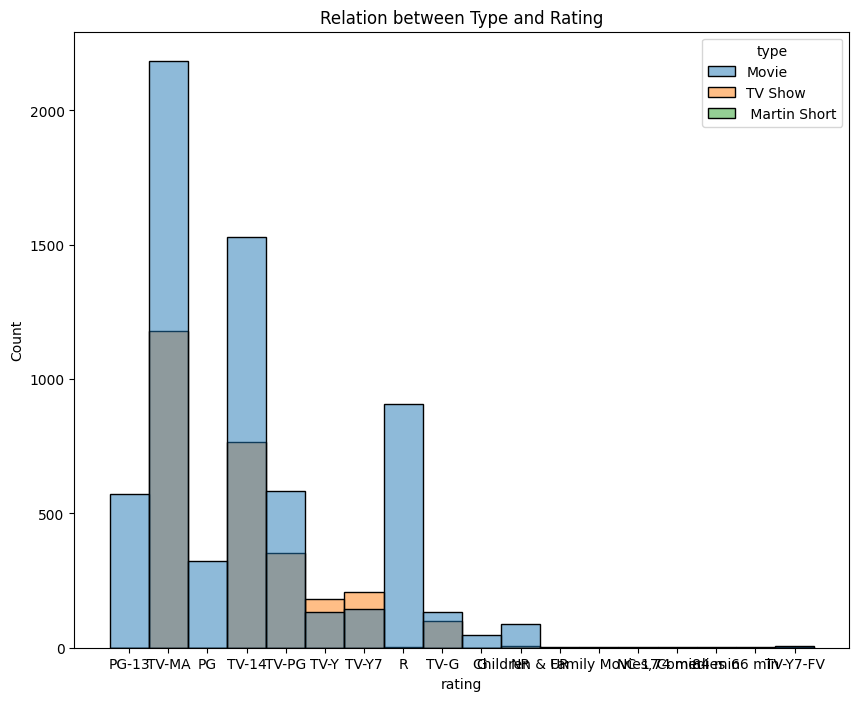

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(x='rating',hue='type',data=netflix)
plt.title('Relation between Type and Rating')
plt.show()


<Axes: xlabel='director', ylabel='Count'>

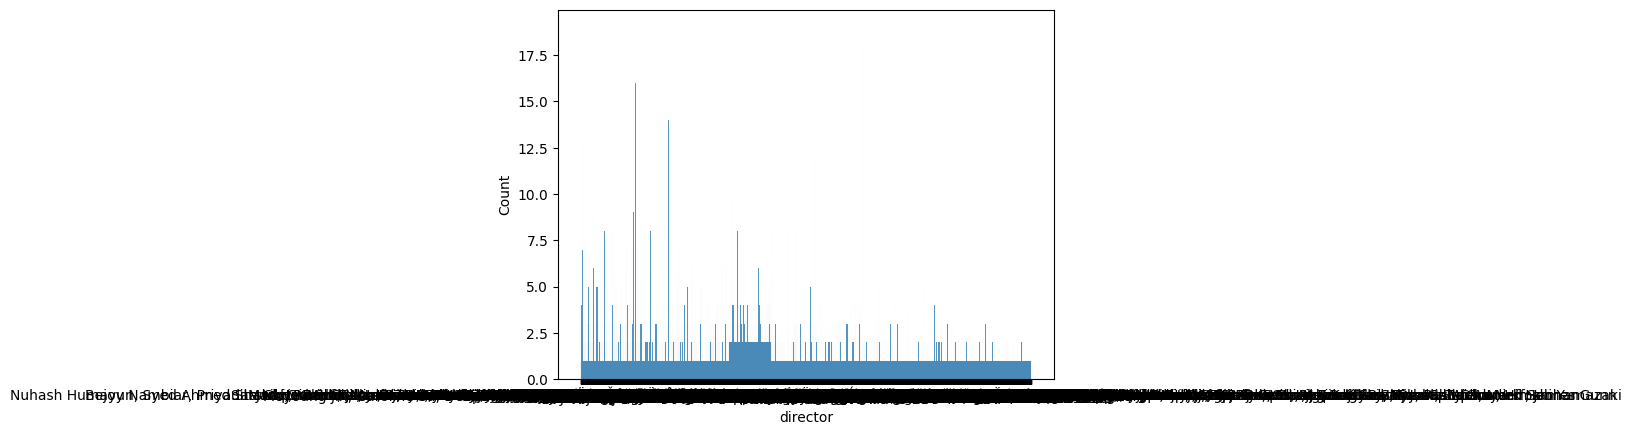

In [ ]:
sns.histplot(netflix['director'])